In [2]:
import os
root = "/root/letractien/data/nas07/Dataset/Image/EMBED/"
jpgs = "jpgs"
annotated_mass = "annotated_mass"
other_jpgs = "other_jpgs"
csv_files = "csv_files"

root_list = os.listdir(root)
jpgs_list = os.listdir(os.path.join(root, jpgs))
annotated_mass_list = os.listdir(os.path.join(root, annotated_mass))
other_jpgs_list = os.listdir(os.path.join(root, other_jpgs))
csv_files_list = os.listdir(os.path.join(root, csv_files))

print(len(root_list))
print(len(jpgs_list))
print(len(annotated_mass_list))
print(len(other_jpgs_list))
print(len(csv_files_list))

4
284815
3186
195611
6


In [3]:
# import os
# import cv2
# import numpy as np
# import preprocess
# import matplotlib.pyplot as plt
# from PIL import Image
# from skimage.measure import label, regionprops

# for i in range(0, 10):
#     # --- Load ảnh ---
#     img_path = os.path.join(root, jpgs, jpgs_list[i])
#     # img_path = os.path.join(root, annotated_mass, annotated_mass_list[0])
#     # img_path = os.path.join(root, other_jpgs, other_jpgs_list[0])

#     img = Image.open(img_path)
#     img_arr = np.array(img)

#     # --- Tiền xử lý ---
#     img_arr, m = preprocess.crop(img_arr)
#     img_arr, m, _ = preprocess.pad_image_to_square(img_arr, mask_array=m, annotation=None)
#     img_arr, m, _ = preprocess.resize_image(img_arr, mask_array=m, annotation=None, output_shape=(640, 640))
#     img_arr = preprocess.truncation_normalization(img_arr, m)

#     # --- Lọc vùng sáng ---
#     thresh = np.percentile(img_arr, 99)
#     binary_white = img_arr > thresh
#     labeled = label(binary_white)
#     mask_filtered = np.zeros_like(binary_white)

#     for region in regionprops(labeled):
#         if 5 < region.area < 200:
#             minr, minc, maxr, maxc = region.bbox
#             aspect_ratio = (maxr - minr) / (maxc - minc + 1e-5)
#             if 0.3 < aspect_ratio < 3:
#                 mask_filtered[labeled == region.label] = 1

#     img_white = np.zeros_like(img_arr)
#     img_white[mask_filtered == 1] = img_arr[mask_filtered == 1]

#     # --- Tăng cường ảnh gốc bằng vùng sáng ---
#     enhanced_img = img_arr.copy()
#     enhanced_img[mask_filtered == 1] = np.clip(
#         enhanced_img[mask_filtered == 1] + img_white[mask_filtered == 1], 0, 255
#     )

#     # --- Hiển thị ảnh ---
#     plt.figure(figsize=(8, 8))
#     plt.imshow(enhanced_img, cmap='gray')
#     plt.axis('off')
#     plt.show()

In [4]:
# import os
# import cv2
# import numpy as np
# import preprocess
# import matplotlib.pyplot as plt
# from PIL import Image
# from skimage.measure import label, regionprops
# from skimage.morphology import closing, disk

# for i in range(0, 10):
#     # --- Load ảnh ---
#     img_path = os.path.join(root, jpgs, jpgs_list[i])
#     img = Image.open(img_path)
#     img_arr = np.array(img)

#     # --- Tiền xử lý ---
#     img_arr, m = preprocess.crop(img_arr)
#     img_arr, m, _ = preprocess.pad_image_to_square(img_arr, mask_array=m, annotation=None)
#     img_arr, m, _ = preprocess.resize_image(img_arr, mask_array=m, annotation=None, output_shape=(640, 640))
#     img_arr = preprocess.truncation_normalization(img_arr, m)

#     # --- Lọc vùng sáng ---
#     thresh = np.percentile(img_arr, 99)
#     binary_white = img_arr > thresh
#     binary_white = closing(binary_white, disk(2))  # lấp lỗ nhỏ
#     labeled = label(binary_white)
#     mask_filtered = np.zeros_like(binary_white)

#     for region in regionprops(labeled):
#         minr, minc, maxr, maxc = region.bbox
#         length = max(maxr - minr, maxc - minc)  # chiều dài lớn nhất của vùng

#         # Lọc theo chiều dài 40-80 pixel
#         if 40 <= length <= 80:
#             aspect_ratio = (maxr - minr) / (maxc - minc + 1e-5)
#             perimeter = region.perimeter + 1e-5
#             circularity = 4 * np.pi * region.area / (perimeter**2)
            
#             # Giữ vùng gần tròn hoặc hơi đa giác (circularity > 0.5)
#             if circularity > 0.5 and 0.3 < aspect_ratio < 3:
#                 mask_filtered[labeled == region.label] = 1

#     img_filtered = np.zeros_like(img_arr)
#     img_filtered[mask_filtered == 1] = img_arr[mask_filtered == 1]

#     # --- Tăng cường ảnh gốc bằng vùng lọc ---
#     enhanced_img = img_arr.copy()
#     enhanced_img[mask_filtered == 1] = np.clip(
#         enhanced_img[mask_filtered == 1] + img_filtered[mask_filtered == 1], 0, 255
#     )

#     # --- Hiển thị ảnh ---
#     plt.figure(figsize=(8, 8))
#     plt.imshow(enhanced_img, cmap='gray')
#     plt.axis('off')
#     plt.show()


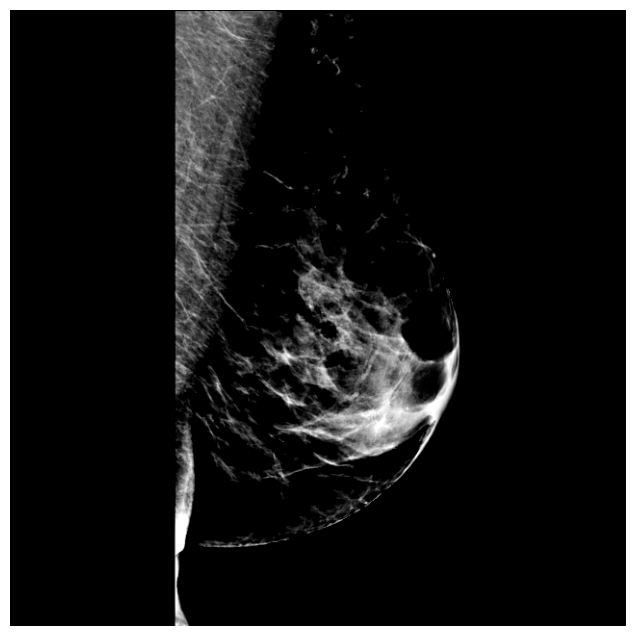

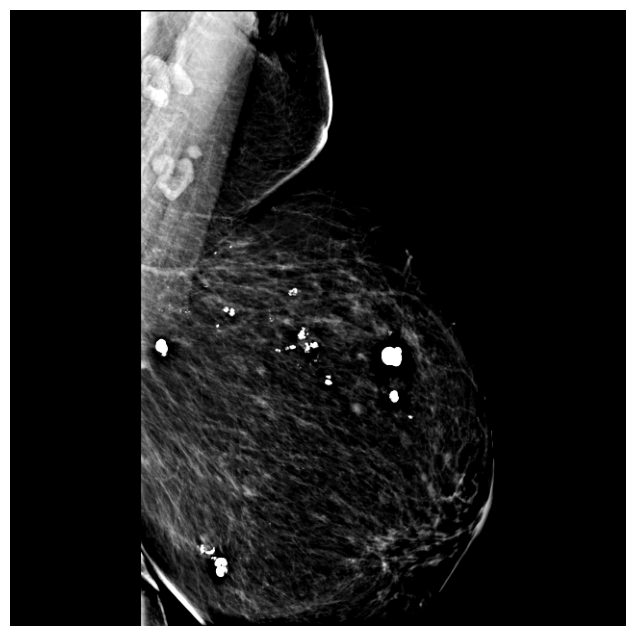

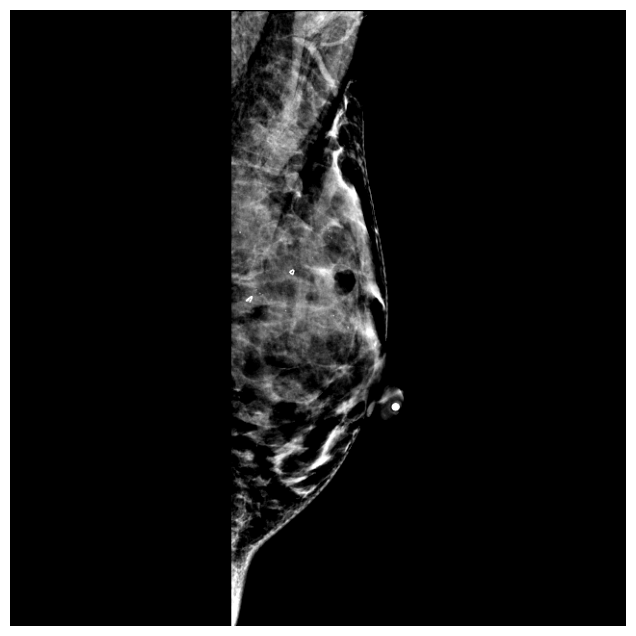

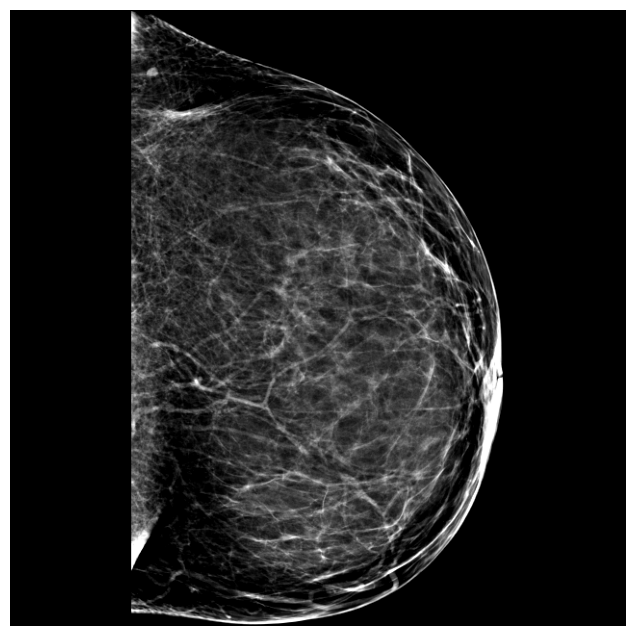

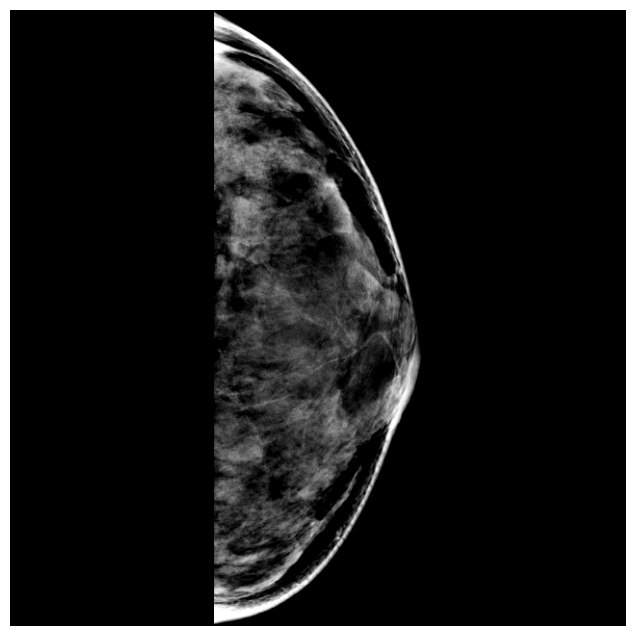

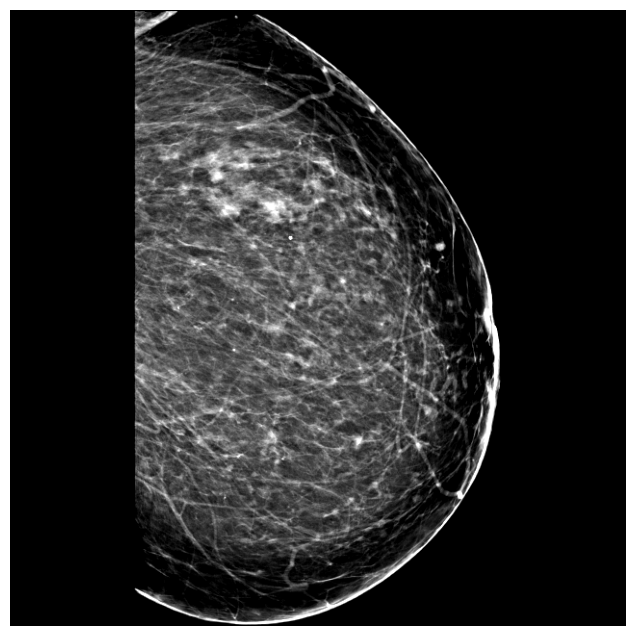

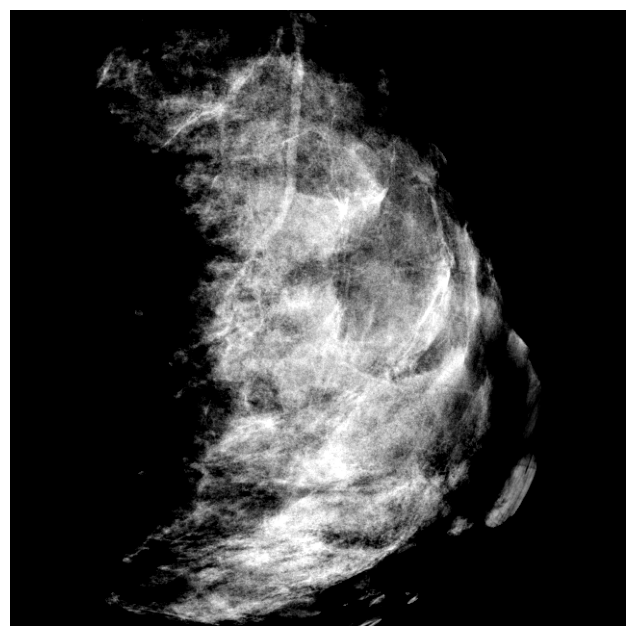

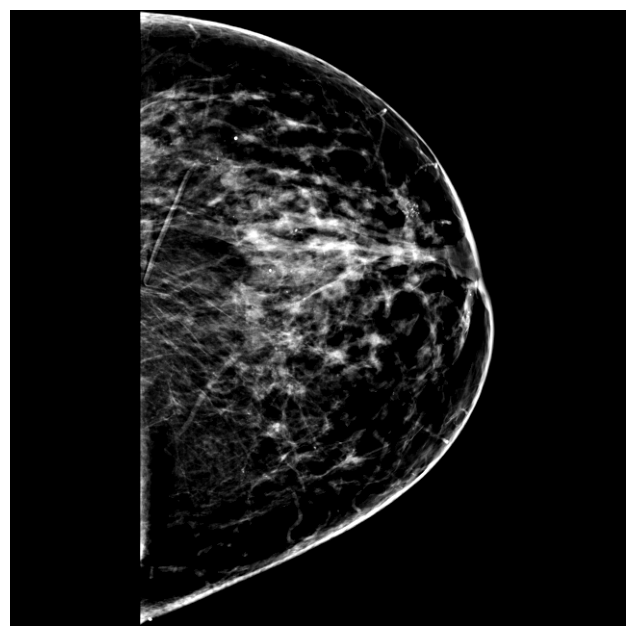

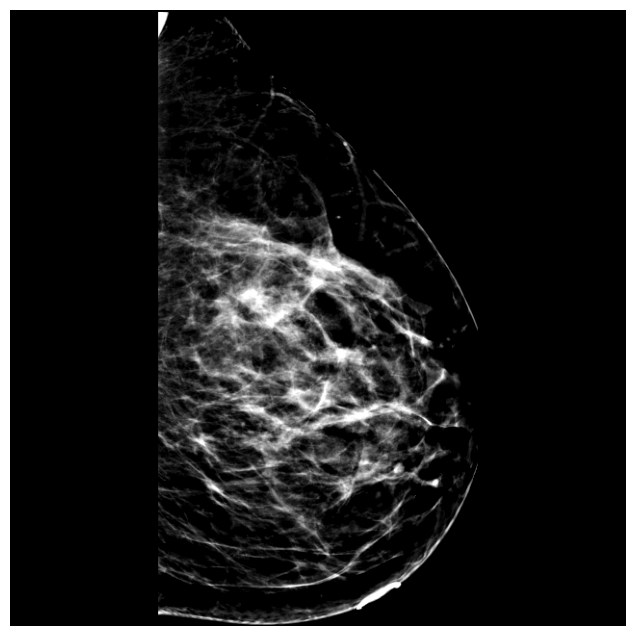

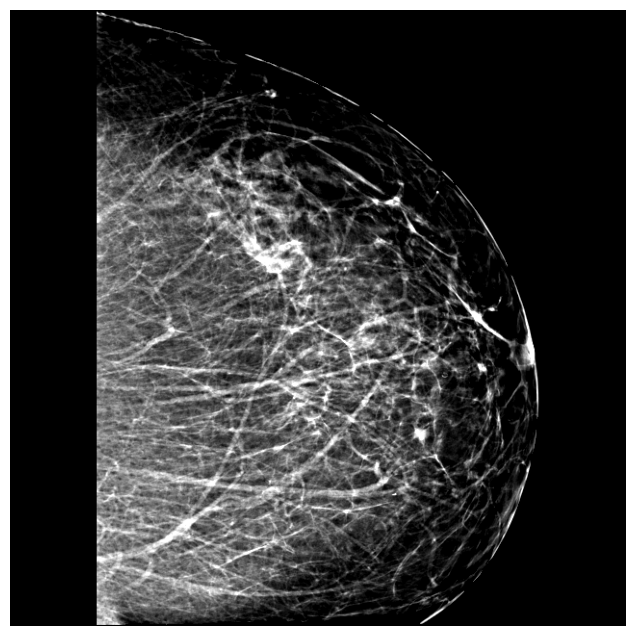

In [6]:
import os
import cv2
import numpy as np
import preprocess
import matplotlib.pyplot as plt
from PIL import Image
from skimage.measure import label, regionprops
from skimage.morphology import closing, disk

for i in range(0, 10):
    # --- Load ảnh ---
    img_path = os.path.join(root, jpgs, jpgs_list[i])
    img = Image.open(img_path)
    img_arr = np.array(img)

    # --- Tiền xử lý ---
    img_arr, m = preprocess.crop(img_arr)
    img_arr, m, _ = preprocess.pad_image_to_square(img_arr, mask_array=m, annotation=None)
    img_arr, m, _ = preprocess.resize_image(img_arr, mask_array=m, annotation=None, output_shape=(640, 640))
    img_arr = preprocess.truncation_normalization(img_arr, m)

    # --- Lọc vùng sáng ---
    thresh = np.percentile(img_arr, 99)
    binary_white = img_arr > thresh
    labeled = label(binary_white)
    mask_filtered = np.zeros_like(binary_white)

    for region in regionprops(labeled):
        minr, minc, maxr, maxc = region.bbox
        length = max(maxr - minr, maxc - minc)  # chiều dài lớn nhất của vùng

        # Lọc theo chiều dài 40-80 pixel
        if 40 <= length <= 80:
            aspect_ratio = (maxr - minr) / (maxc - minc + 1e-5)
            perimeter = region.perimeter + 1e-5
            circularity = 4 * np.pi * region.area / (perimeter**2)
            
            # Giữ vùng gần tròn hoặc hơi đa giác (circularity > 0.5)
            if circularity > 0.5 and 0.3 < aspect_ratio < 3:
                mask_filtered[labeled == region.label] = 1

    img_white = np.zeros_like(img_arr)
    img_white[mask_filtered == 1] = img_arr[mask_filtered == 1]

    # --- Tăng cường ảnh gốc bằng vùng sáng ---
    enhanced_img = img_arr.copy()
    enhanced_img[mask_filtered == 1] = np.clip(
        enhanced_img[mask_filtered == 1] + img_white[mask_filtered == 1], 0, 255
    )

    disp = preprocess.normalize_for_display(enhanced_img)
    disp = np.nan_to_num(disp)

    # --- Hiển thị ảnh ---
    plt.figure(figsize=(8, 8))
    plt.imshow(enhanced_img, cmap='gray')
    plt.axis('off')
    plt.show()
